<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>10. PCA</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>Principal Component Analysis</b></u>
</div>

## Objective:
The objective of this program is to perform a complete end-to-end analysis of the wine dataset by applying Exploratory Data Analysis (EDA), Principal Component Analysis (PCA), and clustering techniques.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [7]:
#Task 1: Exploratory Data Analysis (EDA)

#Load dataset
df=pd.read_csv("wine.csv")
print("Dataset Shape:",df.shape)
print(df.head())

Dataset Shape: (178, 14)
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [8]:
#Summary statistics
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

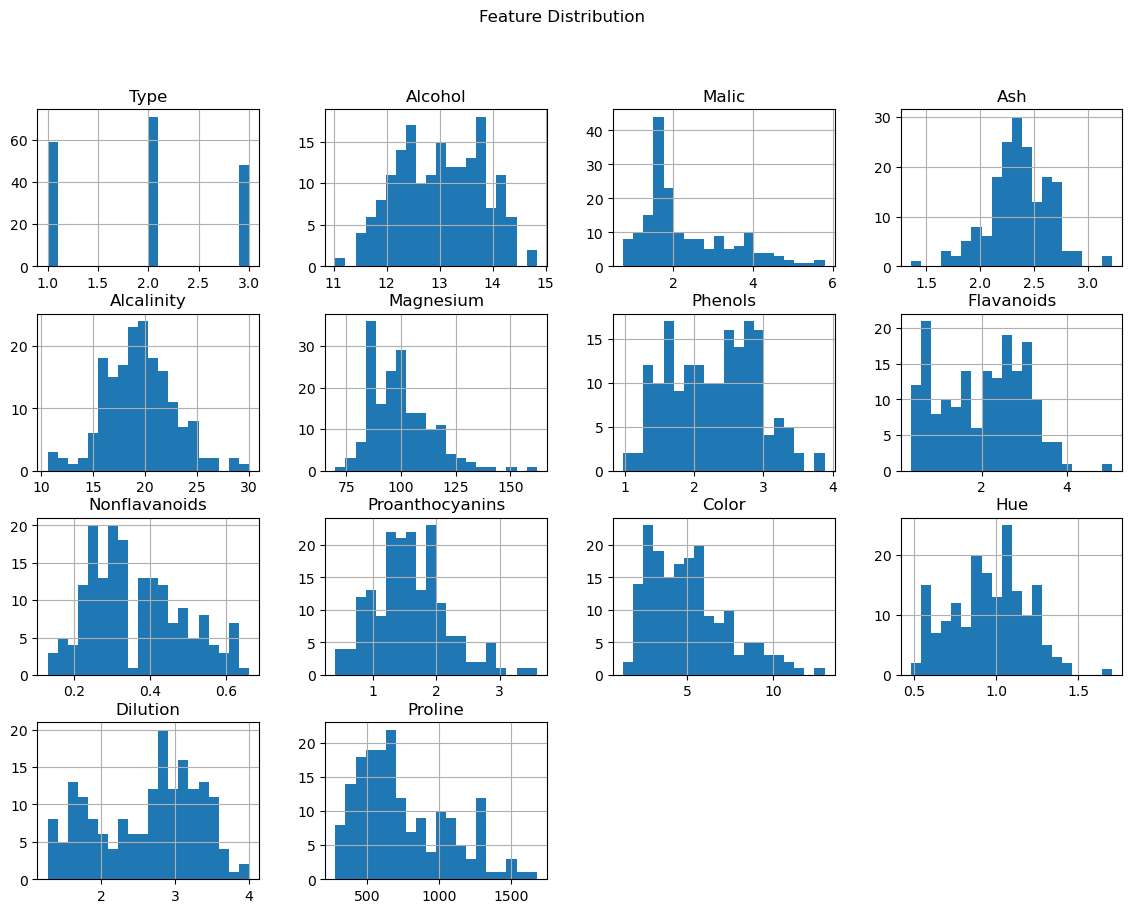

In [9]:
#Histograms

df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distribution")
plt.show()


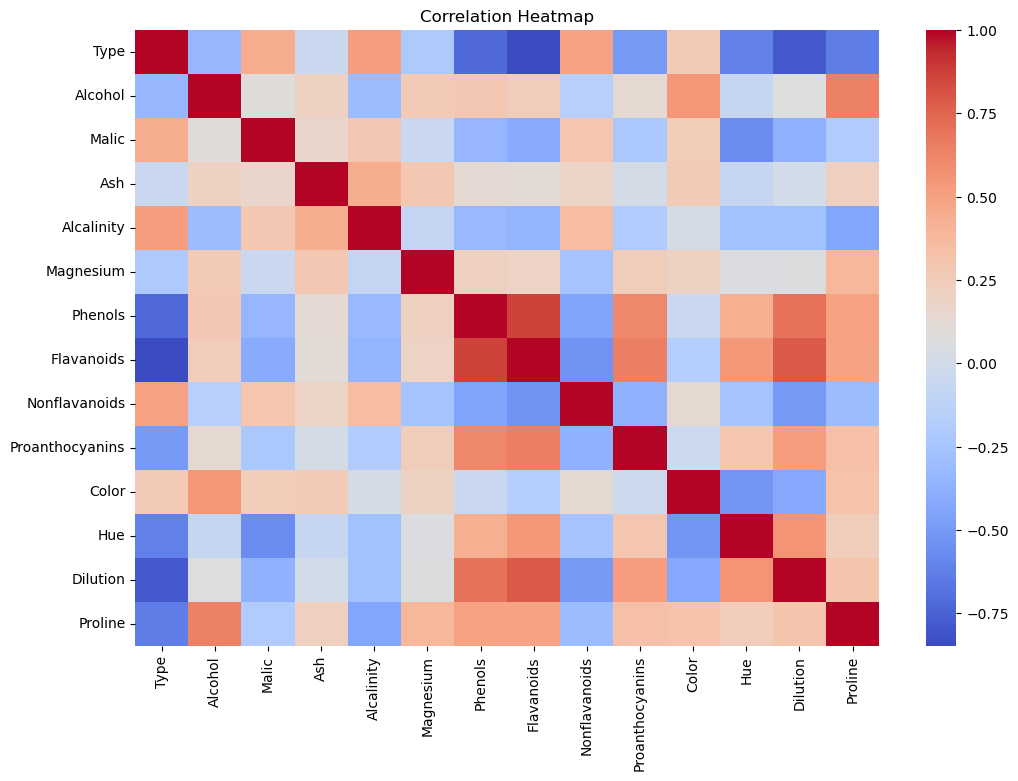

In [10]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
#Task 2: PCA Dimensionality Reduction

#Standardization
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)


In [14]:
#PCA
pca=PCA()
pca_fit=pca.fit(X_scaled)
explained_var=np.cumsum(pca.explained_variance_ratio_)

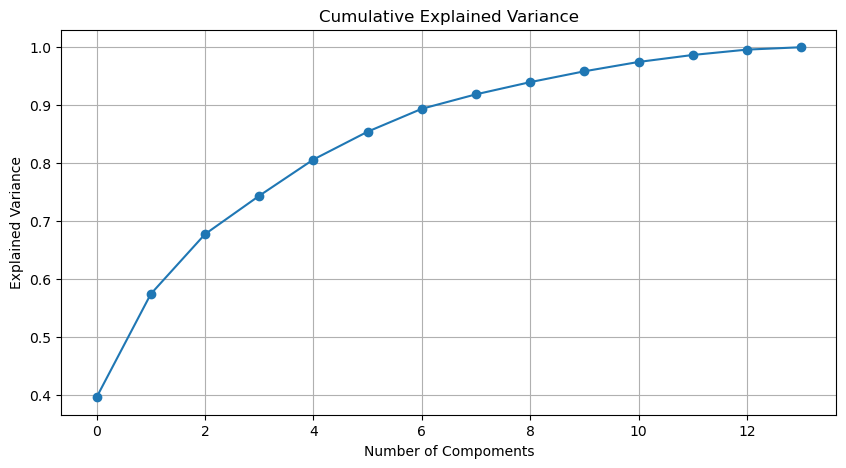

In [15]:
#Scree plot
plt.figure(figsize=(10,5))
plt.plot(explained_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Compoments")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

In [16]:
# Choose #components explaining ~95% variance
n_components=np.argmax(explained_var>=0.95)+1
print("Optimal Components (95% variance):",n_components)
pca_final=PCA(n_components=n_components)
X_pca=pca_final.fit_transform(X_scaled)

print("Transformed PCA shape:", X_pca.shape)
              
        

Optimal Components (95% variance): 10
Transformed PCA shape: (178, 10)


In [22]:
# Task 3: Clustering on Original Data

k=3 # Wine dataset naturally has clusters around 3
kmeans_original=KMeans(n_clusters=k, random_state=42)
labels_orig=kmeans_original.fit_predict(X_scaled)

sil_original=silhouette_score(X_scaled, labels_orig)
db_original=davies_bouldin_score(X_scaled,labels_orig)

print("\nClustering on Original data:")
print("Silhouette Score:",sil_original)
print("Davies-Bouldin Index:",db_original)



Clustering on Original data:
Silhouette Score: 0.3064839832483345
Davies-Bouldin Index: 1.3157075522617727


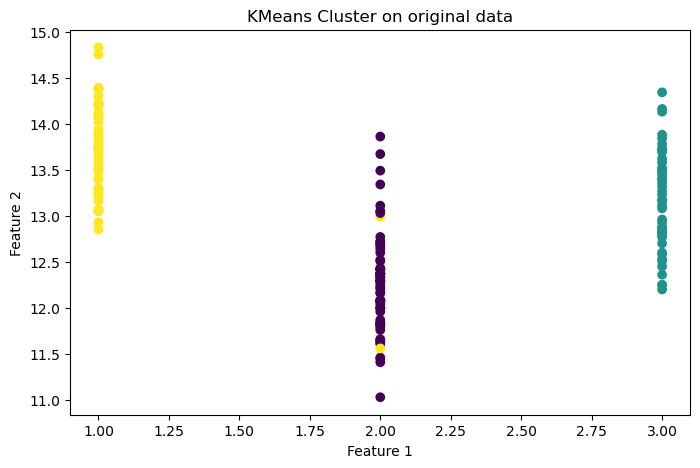

In [23]:
# Plot using 1st two features

plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels_orig,cmap="viridis")
plt.title("KMeans Cluster on original data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [25]:
# Task 4: Clustering on PCA Data

kmeans_pca=KMeans(n_clusters=k, random_state=42)
labels_pca=kmeans_pca.fit_predict(X_pca)

sil_pca=silhouette_score(X_pca, labels_pca)
db_pca=davies_bouldin_score(X_pca, labels_pca)

print("Clustering on PCA data:")
print("Silhoutte Score:", sil_pca)
print("Davies-Bouldin Index:",db_pca)




Clustering on PCA data:
Silhoutte Score: 0.32292055407233017
Davies-Bouldin Index: 1.2578453408449173


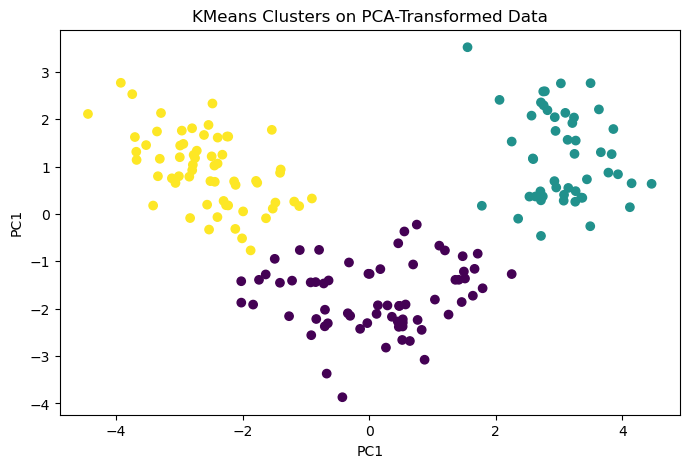

In [26]:
# PCA cluster visualization (first 2 PCs)
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_pca, cmap="viridis")
plt.title("KMeans Clusters on PCA-Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC1")
plt.show()

In [27]:
# Task 5: Comparison & Analysis

print(".........COMPARISON...........")
print(f"Original Data - Silhouette: {sil_original:.4f}, DB Index: {db_original:.4f}")
print(f"PCA Data      - Silhouette: {sil_pca:4f}, DB Index: {db_pca:.4f}")

if sil_pca > sil_original:
    print("Clustering improved after PCA.")
else:
    print("Clustering didnot improve after PCA.")
    

      

.........COMPARISON...........
Original Data - Silhouette: 0.3065, DB Index: 1.3157
PCA Data      - Silhouette: 0.322921, DB Index: 1.2578
Clustering improved after PCA.


In [28]:
# Task 6: Insights


print("""
CONCLUSION:
- PCA reduced dimensionality from high-dimensional space to fewer components 
  while retaining ~95% of the variance.
- Clustering on PCA components is often better because noise and redundant 
  features are removed.
- In this dataset, compare which clustering score is better (silhouette ↑, DB ↓).
- PCA simplifies visualization and sometimes improves cluster separation.
""")


CONCLUSION:
- PCA reduced dimensionality from high-dimensional space to fewer components 
  while retaining ~95% of the variance.
- Clustering on PCA components is often better because noise and redundant 
  features are removed.
- In this dataset, compare which clustering score is better (silhouette ↑, DB ↓).
- PCA simplifies visualization and sometimes improves cluster separation.

